In [84]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import csv
import os
import matplotlib.pyplot as plt

In [85]:
url = 'https://www.imdb.com/list/ls062911411/?sort=user_rating,desc&st_dt=&mode=detail&page=1'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
# response    --> <Response [200]> means it is successful
# print(soup) --> prints the html of the entire page.

In [86]:
movie_name = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
link = []
descriptions = []
genres = []

In [87]:
# When you hover over the movie and click inspect, you can see that the movie information is stored in this div class.
movie_data = soup.findAll('div', attrs = {'class' : 'lister-item mode-detail'}) 
# movie_data --> I can see movie details inside div class

In [88]:

txt_folder = os.path.join("txt")
csv_folder = os.path.join("csv")

metascore_by_year = {}
runtime_by_year = {}

all_movies_txt_filename = os.path.join(txt_folder, "all_movies.txt")
with open(all_movies_txt_filename, mode="w", encoding='utf-8-sig') as all_movies_file:
    for index, point in enumerate(movie_data, start=1):
        
        txt_filename = os.path.join(txt_folder, f"movie{index}.txt")
        with open(txt_filename, mode="w", encoding='utf-8-sig') as file:
            name = point.h3.a.text
            movie_name.append(name)

            new_link = 'https://www.imdb.com' + point.h3.a.get('href')
            link.append(new_link)
            new_url = requests.get(new_link)
            new_soup = BeautifulSoup(new_url.content, 'html.parser')

            release_year = point.h3.find('span', class_='lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
            year.append(release_year)

            run_time = point.p.find('span', class_='runtime').text.replace(' min', '')
            time.append(run_time)

            rate = point.find('div', class_='ipl-rating-star small').text.replace('\n', '')
            rating.append(rate)

            meta = point.find('span', class_='metascore').text.replace(' ', '') if point.find('span', class_='metascore') else '^^^^^^'
            metascore.append(meta)

            value = point.find_all('span', attrs={'name': 'nv'})
            vote = value[0].text.replace(' ', '')
            votes.append(vote)

            grosses = value[1].text if len(value) > 1 else '*****'
            gross.append(grosses)

            file.write(f"Name: {name}\n")
            file.write(f"Release Year: {release_year}\n")
            file.write(f"Run Time: {run_time}\n")
            file.write(f"Rating: {rate}\n")
            file.write(f"Metascore: {meta}\n")
            file.write(f"Votes: {vote}\n")
            file.write(f"Gross: {grosses}\n")
            file.write(f"Link: {new_link}\n")

            all_movies_file.write(f"Movie {index}:\n")
            all_movies_file.write(f"Name: {name}\n")
            all_movies_file.write(f"Release Year: {release_year}\n")
            all_movies_file.write(f"Run Time: {run_time}\n")
            all_movies_file.write(f"Rating: {rate}\n")
            all_movies_file.write(f"Metascore: {meta}\n")
            all_movies_file.write(f"Votes: {vote}\n")
            all_movies_file.write(f"Gross: {grosses}\n")
            all_movies_file.write(f"Link: {new_link}\n")
            all_movies_file.write("\n")

            if release_year not in metascore_by_year:
              metascore_by_year[release_year] = {'sum': 0, 'count': 0}

            if meta != '^^^^^^':
              metascore_by_year[release_year]['sum'] += int(meta)
              metascore_by_year[release_year]['count'] += 1
              average_metascores = {year: data['sum'] / data['count'] if data['count'] > 0 else 0 for year, data in metascore_by_year.items()}

            if release_year not in runtime_by_year:
              runtime_by_year[release_year] = {'sum': 0, 'count': 0}

            runtime_by_year[release_year]['sum'] += int(run_time)
            runtime_by_year[release_year]['count'] += 1

    csv_filename = os.path.join(csv_folder, "movies_data.csv")
    with open(csv_filename, mode="w", newline='', encoding='utf-8-sig') as csv_file:
        writer = csv.writer(csv_file)
        header = ['Name of movie', 'Year of relase', 'Watchtime', 'Movie rating', 'Metascore', 'Votes', 'Gross', 'Link']
        writer.writerow(header)

        for i in range(len(movie_name)):
            writer.writerow([movie_name[i], year[i], time[i], rating[i], metascore[i], votes[i], gross[i], link[i]])


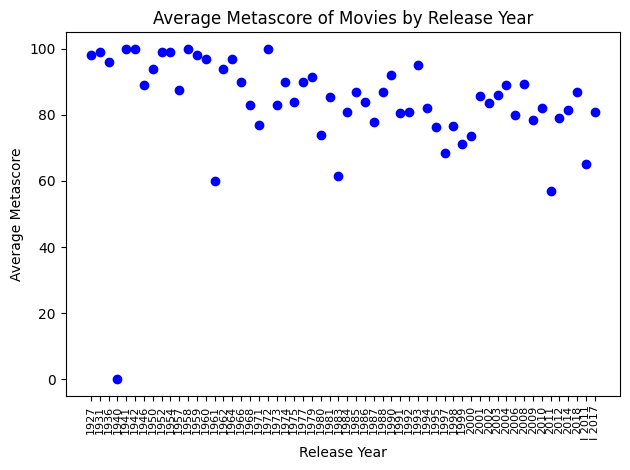

In [89]:
years = list(average_metascores.keys())
scores = list(average_metascores.values())

sorted_years, sorted_scores = zip(*sorted(zip(years, scores)))

plt.scatter(sorted_years, sorted_scores, color='blue')
plt.xlabel('Release Year')
plt.ylabel('Average Metascore')
plt.title('Average Metascore of Movies by Release Year')
plt.xticks(rotation='vertical', fontsize=8) 
plt.tight_layout()
plt.show()

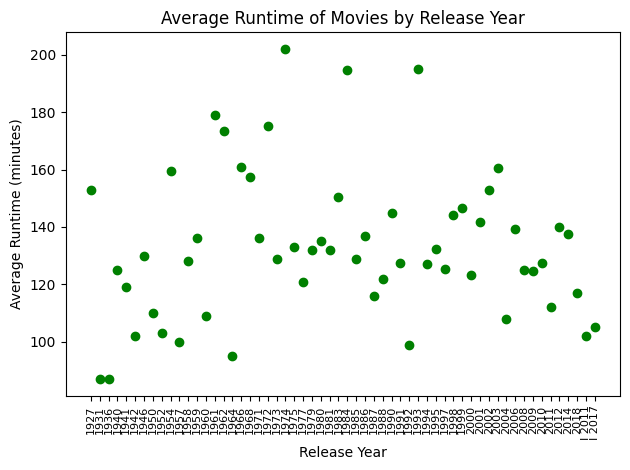

In [90]:
average_runtimes = {year: data['sum'] / data['count'] if data['count'] > 0 else 0 for year, data in runtime_by_year.items()}

sorted_years_runtime, sorted_runtimes = zip(*sorted(zip(list(average_runtimes.keys()), list(average_runtimes.values()))))

plt.scatter(sorted_years_runtime, sorted_runtimes, color='green')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime of Movies by Release Year')
plt.xticks(rotation='vertical', fontsize=8)
plt.tight_layout()
plt.show()


In [91]:
# NumPy library to find the number of non-zero elements in a NumPy array
# np.count_nonzero(movie_name) --> 100

In [92]:
movie_DF = pd.DataFrame({'Name of movie' : movie_name, 'Year of relase' : release_year, 'Watchtime' : time, 'Movie rating' : rating, 'Metascore' : metascore, 'Votes' : votes, 'Gross' : gross, 'Link': link})

In [93]:
movie_DF


,Name of movie,Year of relase,Watchtime,Movie rating,Metascore,Votes,Gross,Link
0,The Shawshank Redemption,1952,142,9.3,82,"2,851,826",$28.34M,https://www.imdb.com/title/tt0111161/
1,The Godfather,1952,175,9.2,100,"1,987,035",$134.97M,https://www.imdb.com/title/tt0068646/
2,The Dark Knight,1952,152,9,84,"2,833,131",$534.86M,https://www.imdb.com/title/tt0468569/
3,Schindler's List,1952,195,9,95,"1,432,638",$96.90M,https://www.imdb.com/title/tt0108052/
4,The Lord of the Rings: The Return of the King,1952,201,9,94,"1,953,712",$377.85M,https://www.imdb.com/title/tt0167260/
...,...,...,...,...,...,...,...,...
95,Metropolis,1952,153,8.3,98,"183,532",$1.24M,https://www.imdb.com/title/tt0017136/
96,North by Northwest,1952,136,8.3,98,"343,196",$13.28M,https://www.imdb.com/title/tt0053125/
97,To Kill a Mockingbird,1952,129,8.3,88,"330,167",*****,https://www.imdb.com/title/tt0056592/
98,Judgment at Nuremberg,1952,179,8.3,60,"83,860",*****,https://www.imdb.com/title/tt0055031/
